In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Penetracion Internet Fijo

KPI1 -> Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [2]:
pe_in = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275028/data.csv')

In [3]:
pe_in.sample(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
714,2015,2,San Luis,"9,71"
260,2020,1,Santa Fe,"69,52"
747,2014,4,Chaco,"21,87"
811,2014,2,Santa Cruz,"29,38"
455,2018,1,Tucumán,"41,18"


In [4]:
pe_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [5]:
pe_in_copy = pe_in.copy()

In [6]:
pe_in_copy['Accesos por cada 100 hogares'] = pe_in_copy['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
pe_in_copy['Accesos por cada 100 hogares']

0       78.11
1      122.28
2       65.33
3       43.86
4       84.38
        ...  
835     28.94
836     47.85
837     16.31
838     63.97
839     33.42
Name: Accesos por cada 100 hogares, Length: 840, dtype: float64

In [7]:
pe_in_copy.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


In [8]:
provincia = 'Santiago del estero'
year = 2022

pe_in_copy = pe_in_copy[pe_in_copy.Provincia.str.lower() == provincia.lower()]
pe_in_copy = pe_in_copy[pe_in_copy['Año'] == year]
pe_in_copy.sort_values('Trimestre', ascending=True, inplace=True)
pe_in_copy

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
69,2022,1,Santiago Del Estero,47.17
45,2022,2,Santiago Del Estero,47.70
21,2022,3,Santiago Del Estero,47.98


Porcentajes de aumento entre cuartiles: [1.1235955056179798, 0.5870020964360462]
Promedio de aumento: 0.8552988010270131
Se requieren 3 nuevas conexiones para lograr un aumento de 2% el siguiente trimestre


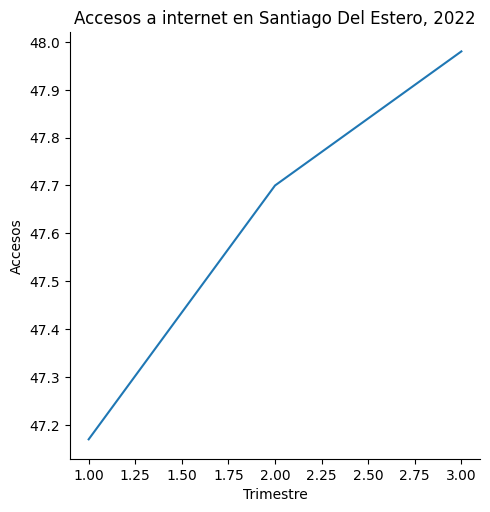

In [9]:
sns.relplot(data = pe_in_copy,
           x = pe_in_copy['Trimestre'],
           y = pe_in_copy['Accesos por cada 100 hogares'],
           kind = 'line',	aspect= 1).set(title = f'Accesos a internet en {provincia.title()}, {year}', ylabel = 'Accesos')

valores = pe_in_copy['Accesos por cada 100 hogares'].values

aumento_accesos = []

for i in range(len(valores) - 1):
    porcentaje = ((valores[i+1] - valores[i]) / valores[i]) * 100
    aumento_accesos.append(porcentaje)
    
promedio = sum(aumento_accesos) / len(aumento_accesos)
KPI1 = 2
meta1 = (sum(valores) * KPI1) / 100

print(f'Porcentajes de aumento entre cuartiles: {aumento_accesos}')
print(f'Promedio de aumento: {round(promedio, 2)}%')
print(f'Se requieren {round(meta1)} nuevas conexiones para lograr un aumento de {KPI1}% el siguiente trimestre')

---

KPI2 -> Aumentar la tecnologia wireless en las regiones montañosas en un 10%

El criterio usado para definir a una region como _montañosa_ se basa en que la superficie de las montañas debe superar el 40% de la superficie total de la provincia.

Las provincias seleccionadas fueron:

- Catamarca

- Jujuy

- Chubut

- La rioja

- Mendoza

- Neuquen

- Salta

- San juan

- Tucuman

Informacion extraida del articulo [_Areas de montaña de la republica de Argentina_](https://www.argentina.gob.ar/sites/default/files/montanas_publicacion_completo_7_05_2019.pdf), publicado por: Instituto Geografico Nacional Republica de Argentina.

In [10]:
tec_lo = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/279175/data.csv')

In [11]:
regiones = ['Catamarca', 'Jujuy', 'Chubut', 'La rioja', 'Mendoza', 'Neuquén', 'Salta', 'San juan', 'Tucumán']

### analizar composicion

In [12]:
tec_lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [13]:
tec_lo.sample(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
886,CHUBUT,Futaleufú,Villa Futalaufquen,26035070,- 0,- 0,- 0,- 0,- 0,5,- 0,- 0,5,NaN
2324,SALTA,La Caldera,Vaqueros,66077020,159,- 0,- 0,90,250,- 0,- 0,469,968,NaN
2194,RIO NEGRO,General Roca,Chichinales,62042380,- 0,- 0,- 0,2,- 0,1,- 0,232,235,NaN
1904,MENDOZA,Luján de Cuyo,Luján de Cuyo,50063090,2.450,9,29,4.074,608,1,- 0,1.829,9.000,NaN
687,BUENOS AIRES,Tres De Febrero,Loma Hermosa,6840010,1.210,5.544,- 0,52,18,- 0,- 0,- 0,6.824,NaN


### Analizar datos

In [14]:
tec_lo_copy = tec_lo.copy()

In [15]:
tec_lo_copy.sample(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
1280,CORDOBA,Tercero Arriba,Oliva,14161110,1.532,- 0,- 0,1.893,- 0,- 0,- 0,162,3.587,NaN
2252,RIO NEGRO,San Antonio,San Antonio Oeste,62077050,784,- 0,4,2.248,- 0,12,- 0,833,3.881,NaN
2725,SANTA FE,Iriondo,Barrio Cicarelli,82056010,- 0,- 0,- 0,- 0,- 0,- 0,- 0,9,9,NaN
1927,MENDOZA,Maipú,Villa Teresa,50070100,- 0,- 0,- 0,- 0,- 0,- 0,- 0,38,38,NaN
1925,MENDOZA,Maipú,Barrio Jesús de Nazaret,50070020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,33,33,NaN


In [16]:
tec_lo_copy['WIRELESS'].replace('- 0', '0', inplace=True)
tec_lo_copy['WIRELESS'] = tec_lo_copy['WIRELESS'].astype(float)
tec_lo_copy = tec_lo_copy[tec_lo_copy.Provincia.str.capitalize().isin(regiones) == True]
tec_lo_copy

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
717,CATAMARCA,Ambato,El Bolsón,10007030,- 0,- 0,- 0,- 0,- 0,1,- 0,0.0,1,NaN
718,CATAMARCA,Ambato,El Rodeo,10007040,- 0,- 0,- 0,- 0,- 0,1,- 0,152.0,153,NaN
719,CATAMARCA,Ambato,La Puerta,10007060,- 0,- 0,- 0,- 0,- 0,5,- 0,0.0,5,NaN
720,CATAMARCA,Ambato,Las Chacritas,10007070,- 0,- 0,- 0,- 0,- 0,1,- 0,0.0,1,NaN
721,CATAMARCA,Ambato,Los Varela,10007110,- 0,- 0,- 0,- 0,- 0,1,- 0,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,SAN JUAN,Ullum,Villa Ibáñez,70112010,- 0,- 0,1,- 0,- 0,- 0,- 0,402.0,403,NaN
2460,SAN JUAN,Valle Fértil,Astica,70119010,- 0,- 0,- 0,- 0,- 0,- 0,- 0,30.0,30,NaN
2461,SAN JUAN,Valle Fértil,OTROS,Sin Datos,- 0,- 0,- 0,- 0,190,- 0,- 0,0.0,190,NaN
2462,SAN JUAN,Valle Fértil,Villa San Agustín,70119060,- 0,- 0,- 0,1,- 0,4,- 0,260.0,265,NaN


In [17]:
wir_pro = tec_lo_copy.groupby(['Provincia']).agg({'WIRELESS':['sum']})
# wir_pro.reset_index().rename(columns={'index':'ID'})
# wir_pro.reset_index(inplace=True)
wir_pro

,WIRELESS
,sum
Provincia,
CATAMARCA,1329.000
CHUBUT,4641.168
JUJUY,4033.000
LA RIOJA,5173.223
MENDOZA,15206.431
SALTA,4374.713
SAN JUAN,6548.327


[Text(0.5, 0, 'Conexiones Wireless'), Text(0, 0.5, 'Provincia')]

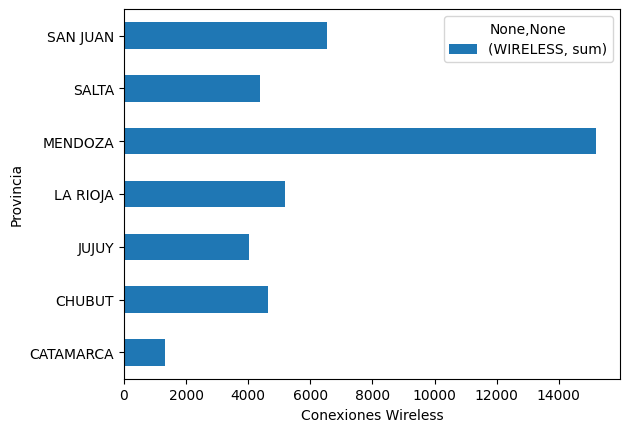

In [18]:
plot = wir_pro.plot(kind='barh')
plot.set(xlabel = 'Conexiones Wireless',
         ylabel = 'Provincia')

In [19]:
sum(wir_pro.WIRELESS['sum'])

valores = wir_pro.WIRELESS.values
KPI2 = 10
meta2 = round((sum(wir_pro.WIRELESS['sum']) * (KPI2 / 100))) 
print(f'Para lograr un aumento del {KPI2}% en las conexiones de tipo Wireless en las regiones montañosas de Argentina, se deben lograr una cantidad de {meta2} nuevos accesos.')

Para lograr un aumento del 10% en las conexiones de tipo Wireless en las regiones montañosas de Argentina, se deben lograr una cantidad de 4131 nuevos accesos.


---

KPI3 -> Subir en 7% de velocidad de bajada en cada una de las regiones montanosas para el proximo cuartil.

In [20]:
vel_bajada = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/290237/data.csv')
vel_bajada.sample(5)

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
243,2020,1,Chaco,26,NaN,NaN
547,2017,1,Santa Cruz,4,NaN,NaN
401,2018,3,San Juan,6,NaN,NaN
543,2017,1,Río Negro,4,NaN,NaN
345,2019,1,Jujuy,9,NaN,NaN


In [46]:
vel_bajada_copy = vel_bajada.copy()
vel_bajada_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [47]:
del vel_bajada_copy['Unnamed: 4']
del vel_bajada_copy['Unnamed: 5']
vel_bajada_copy = vel_bajada_copy[vel_bajada_copy.Provincia.str.capitalize().isin(regiones) == True]
vel_bajada_copy

,Año,Trimestre,Provincia,Mbps (Media de bajada)
2,2022,3,Catamarca,61
4,2022,3,Chubut,16
9,2022,3,Jujuy,32
11,2022,3,La Rioja,44
12,2022,3,Mendoza,34
...,...,...,...,...
828,2014,1,Mendoza,4
830,2014,1,Neuquén,4
832,2014,1,Salta,3
833,2014,1,San Juan,3


In [48]:
provincia = 'jujuy'
year = 2022

vel_bajada_copy = vel_bajada_copy[vel_bajada_copy.Provincia.str.lower() == provincia.lower()]
vel_bajada_copy = vel_bajada_copy[vel_bajada_copy.Año == year]
vel_bajada_copy.sort_values('Trimestre', ascending = True, inplace = True)
vel_bajada_copy

,Año,Trimestre,Provincia,Mbps (Media de bajada)
57,2022,1,Jujuy,28
33,2022,2,Jujuy,29
9,2022,3,Jujuy,32


Porcentaje de aumento entre cuartiles: [3.571428571428571, 10.344827586206897]
Promedio de aumento: 6.96%
Se deben aumentar 6.23 Mbps para lograr un aumento del 7% en la velocidad de bajada en las regiones montanosas el siguiente trimestre


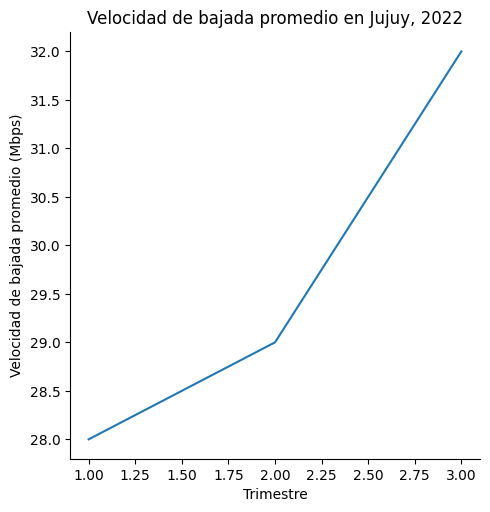

In [49]:
graf = sns.relplot(data = vel_bajada_copy,
            x = vel_bajada_copy.Trimestre,
            y = vel_bajada_copy['Mbps (Media de bajada)'],
            kind = 'line')

graf.set(title = f'Velocidad de bajada promedio en {provincia.capitalize()}, {year}',
         xlabel = 'Trimestre',
         ylabel = 'Velocidad de bajada promedio (Mbps)')

valores = vel_bajada_copy['Mbps (Media de bajada)'].values

aumento_vel = []

for i in range(len(valores) - 1):
    porcentaje = ((valores[i+1] - valores[i]) / valores[i]) * 100
    aumento_vel.append(porcentaje)

promedio = sum(aumento_vel) / len(aumento_vel)

KPI3 = 7
meta3 = (sum(valores) * KPI3) / 100

print(f'Porcentaje de aumento entre cuartiles: {aumento_vel}')
print(f'Promedio de aumento: {round(promedio, 2)}%')
print(f'Se deben aumentar {round(meta3, 2)} Mbps para lograr un aumento del {KPI3}% en la velocidad de bajada en las regiones montanosas el siguiente trimestre')